<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System--part-2./blob/master/1_1_3_Credit_Scoring_Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT SCORING USING LOGISTIC REGRESSION

# Step 1: Setting Up the Environment

In [64]:
#  Setting Up the Environment
# Ensure Python is installed on your system. You will need several Python libraries, including pandas, NumPy, matplotlib, seaborn, and scikit-learn. Install these libraries using pip:


In [2]:
# Install required libraries

In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn

# Step 2: Importing Libraries

In [65]:
# Importing Libraries
# Import the necessary libraries in your Python script or Jupyter notebook:

In [5]:

import pandas as pd  # Data manipulation and analysis

In [6]:
import numpy as np  # Numerical computing

In [7]:
import matplotlib.pyplot as plt  # Data visualization

In [8]:
import seaborn as sns  # Data visualization

In [9]:
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

In [10]:
from sklearn.linear_model import LogisticRegression  # Logistic regression model

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Model evaluation metrics

# data wrangling

In [159]:
# Load the original dataset

In [161]:
data = pd.read_csv('german.data', delimiter=' ', header=None)

In [162]:
# Extract the number of columns from the first row

In [163]:
num_columns = data.shape[1]

In [164]:
# Generate column names as indices

In [165]:
column_names = [f"column{i}" for i in range(num_columns)]

In [166]:
# Assign column names to the dataset

In [167]:
data.columns = column_names

In [168]:
# Save the dataset to a CSV file

In [169]:
data.to_csv('organized_dataset.csv', index=False)

In [170]:
print("Dataset has been organized and saved as 'organized_dataset.csv'.")

Dataset has been organized and saved as 'organized_dataset.csv'.


# Step 3: Loading the Organized Dataset

In [12]:
# Load the Data
# We load the organized dataset from a CSV file named 'organized_data.csv' into a pandas DataFrame named 'df'.

In [13]:
df = pd.read_csv('organized_dataset.csv')

# step 4: Expalanatory Data Analysis

In [14]:

# Inspect the Data
# We inspect the first few rows, information, and summary statistics of the dataset to understand its structure and characteristics.


In [15]:
df.head()   # Display the first few rows of the dataset

,column0,column1,column2,column3,column4,column5,column6,column7,column8,column9,...,column11,column12,column13,column14,column15,column16,column17,column18,column19,column20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [16]:
df.info()   # Display information about the dataset, such as data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   column0   1000 non-null   object
 1   column1   1000 non-null   int64 
 2   column2   1000 non-null   object
 3   column3   1000 non-null   object
 4   column4   1000 non-null   int64 
 5   column5   1000 non-null   object
 6   column6   1000 non-null   object
 7   column7   1000 non-null   int64 
 8   column8   1000 non-null   object
 9   column9   1000 non-null   object
 10  column10  1000 non-null   int64 
 11  column11  1000 non-null   object
 12  column12  1000 non-null   int64 
 13  column13  1000 non-null   object
 14  column14  1000 non-null   object
 15  column15  1000 non-null   int64 
 16  column16  1000 non-null   object
 17  column17  1000 non-null   int64 
 18  column18  1000 non-null   object
 19  column19  1000 non-null   object
 20  column20  1000 non-null   int64 
dtypes: int64(8), ob

In [17]:
df.describe()   # Display summary statistics of numerical columns

,column1,column4,column7,column10,column12,column15,column17,column20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [18]:

# Check for Missing Values
# We check for missing values in the dataset, as missing data can affect the quality of analysis.

In [19]:
df.isnull().sum()   # Display the count of missing values for each column

column0     0
column1     0
column2     0
column3     0
column4     0
column5     0
column6     0
column7     0
column8     0
column9     0
column10    0
column11    0
column12    0
column13    0
column14    0
column15    0
column16    0
column17    0
column18    0
column19    0
column20    0
dtype: int64

In [20]:
# Handle Missing Values
# Depending on the nature and amount of missing data, we may fill missing values with the mean or median, or drop rows/columns containing missing values.
# Here, we fill missing values with the mean of each column.

In [24]:
# df.fillna(df.mean(), inplace=True)

In [22]:
# Check for Duplicate Values
# Duplicate rows can skew analysis results, so we check for and remove duplicates if present.

In [25]:
df.duplicated().sum()   # Display the count of duplicate rows

0

In [26]:
# Remove Duplicate Values
# If duplicates are found, we remove them to ensure data integrity.

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
# Visualize the Data
# Visualizing the data helps in gaining insights and understanding distributions and patterns within the dataset.
# Here, we create histograms with kernel density estimation curves for each numerical column.

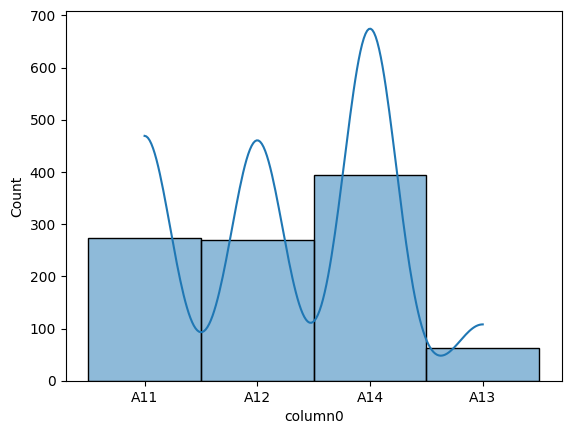

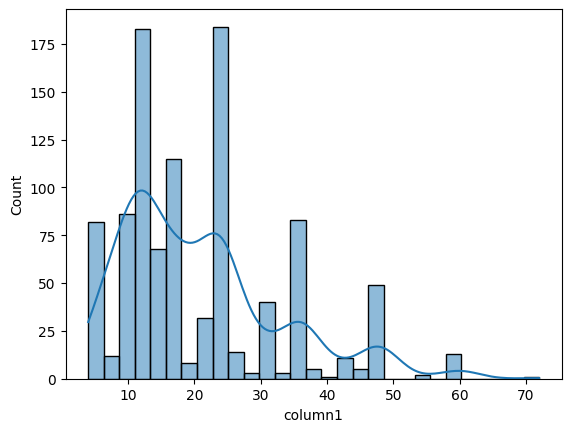

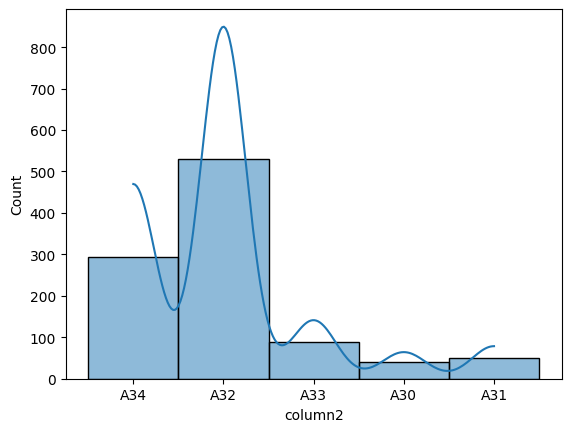

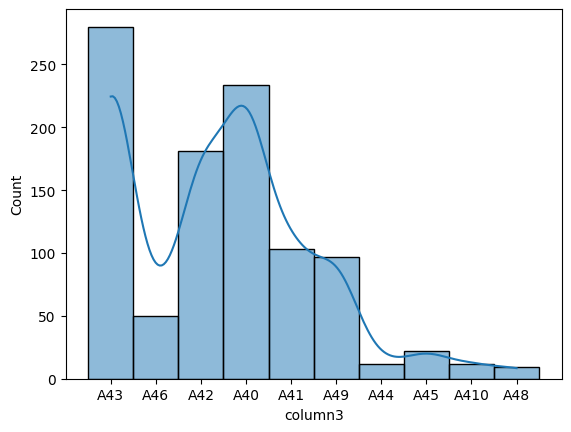

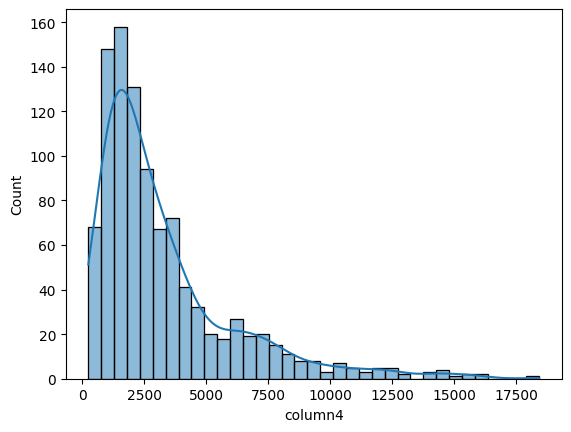

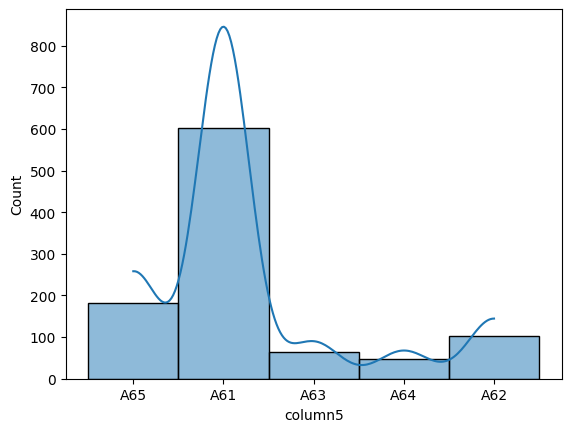

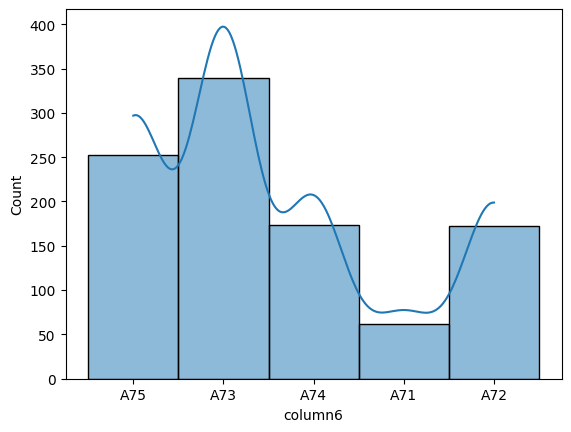

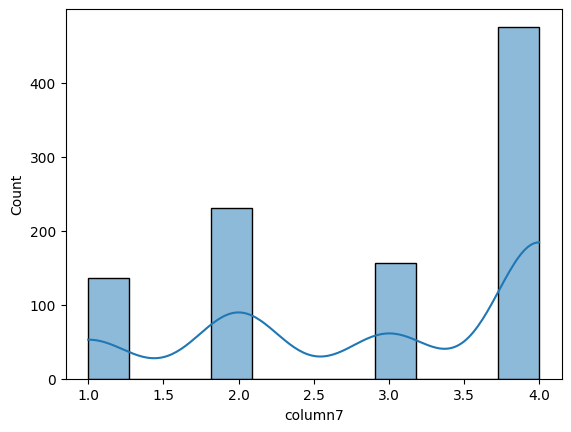

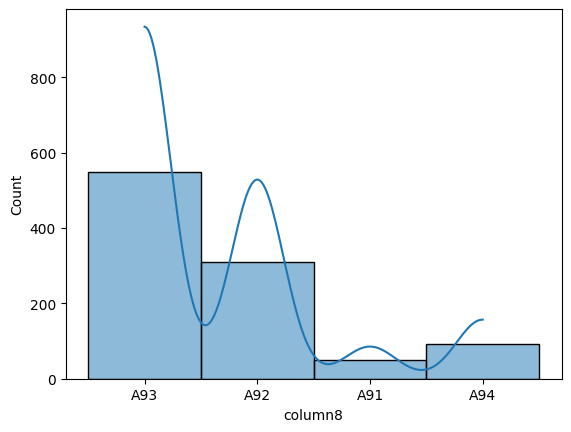

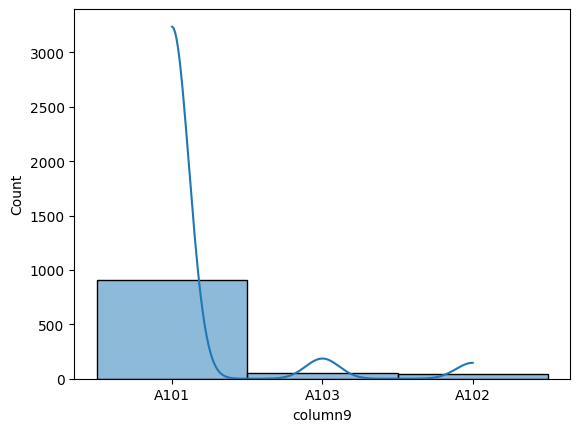

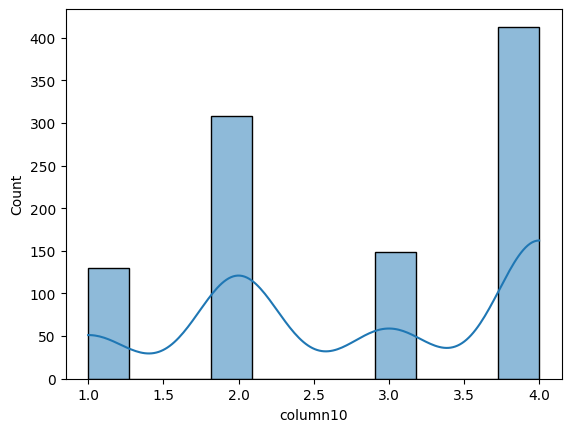

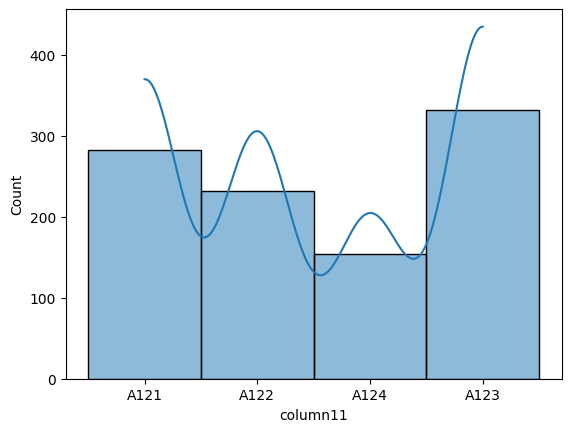

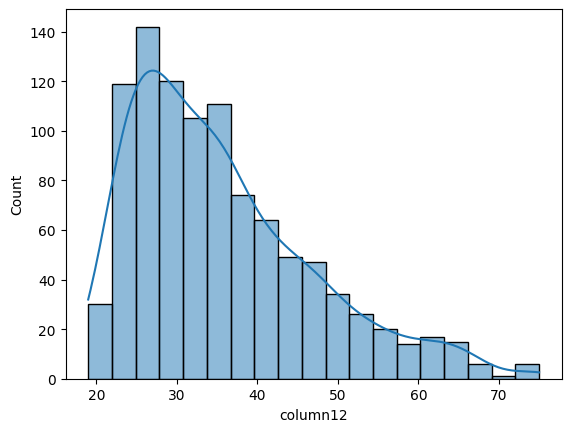

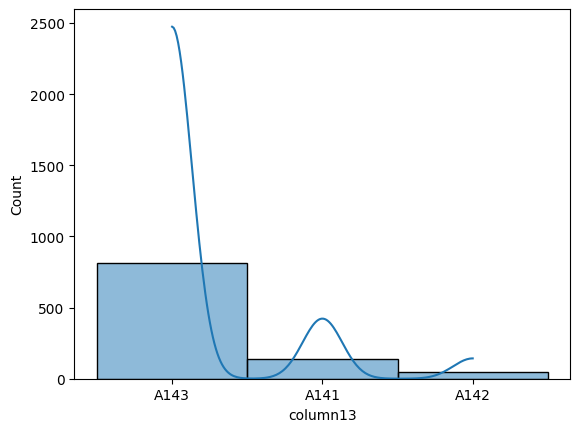

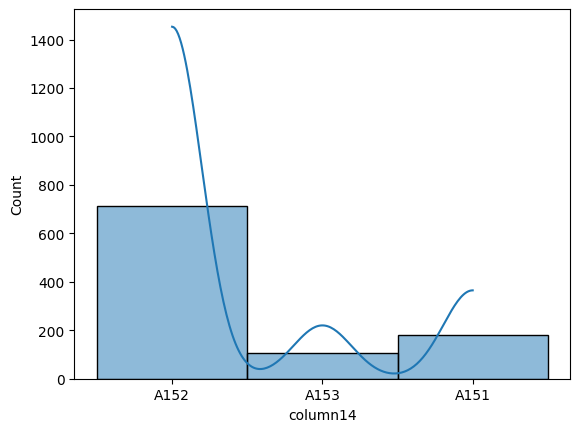

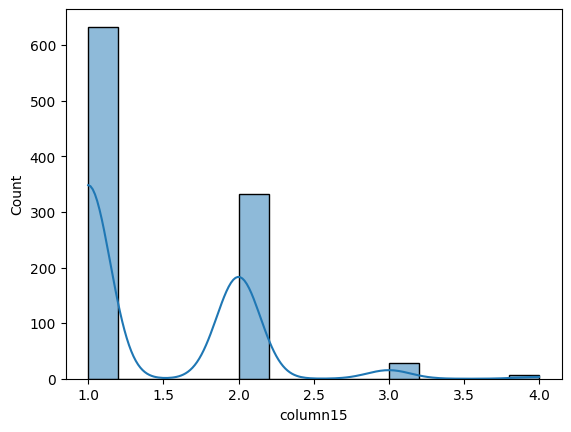

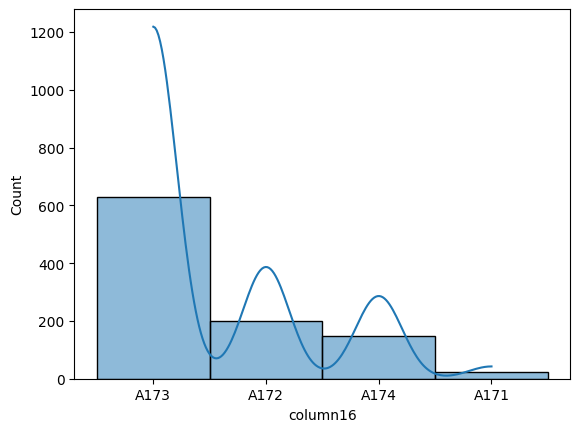

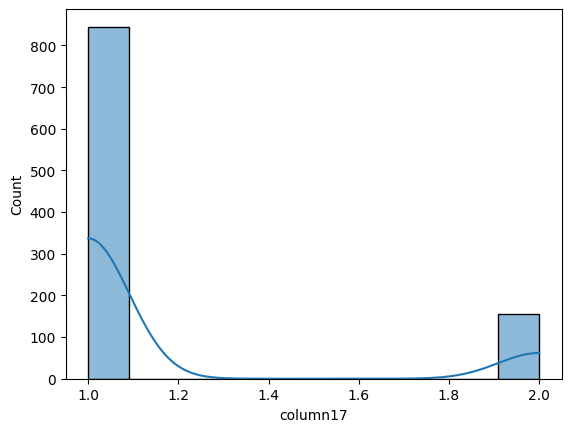

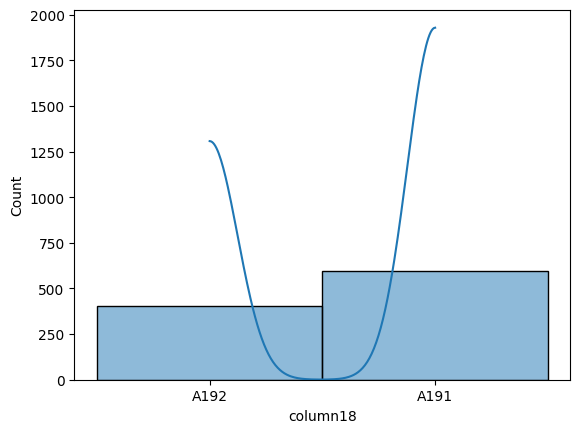

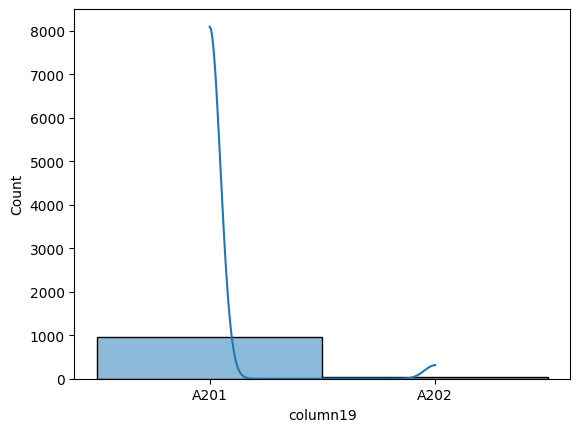

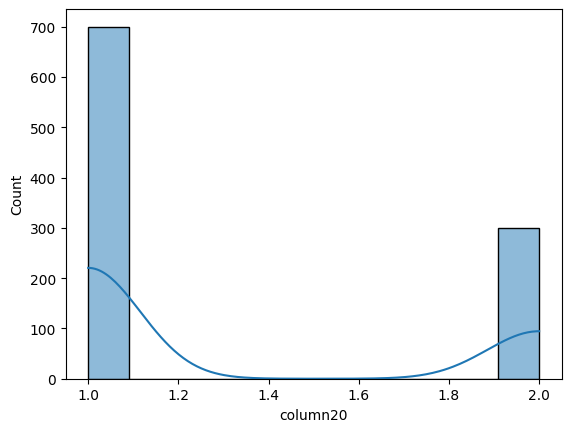

In [29]:
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.show()

In [30]:
# Check Data Distribution
# We examine the distribution of data in each column to identify skewness, outliers, or other distribution characteristics.


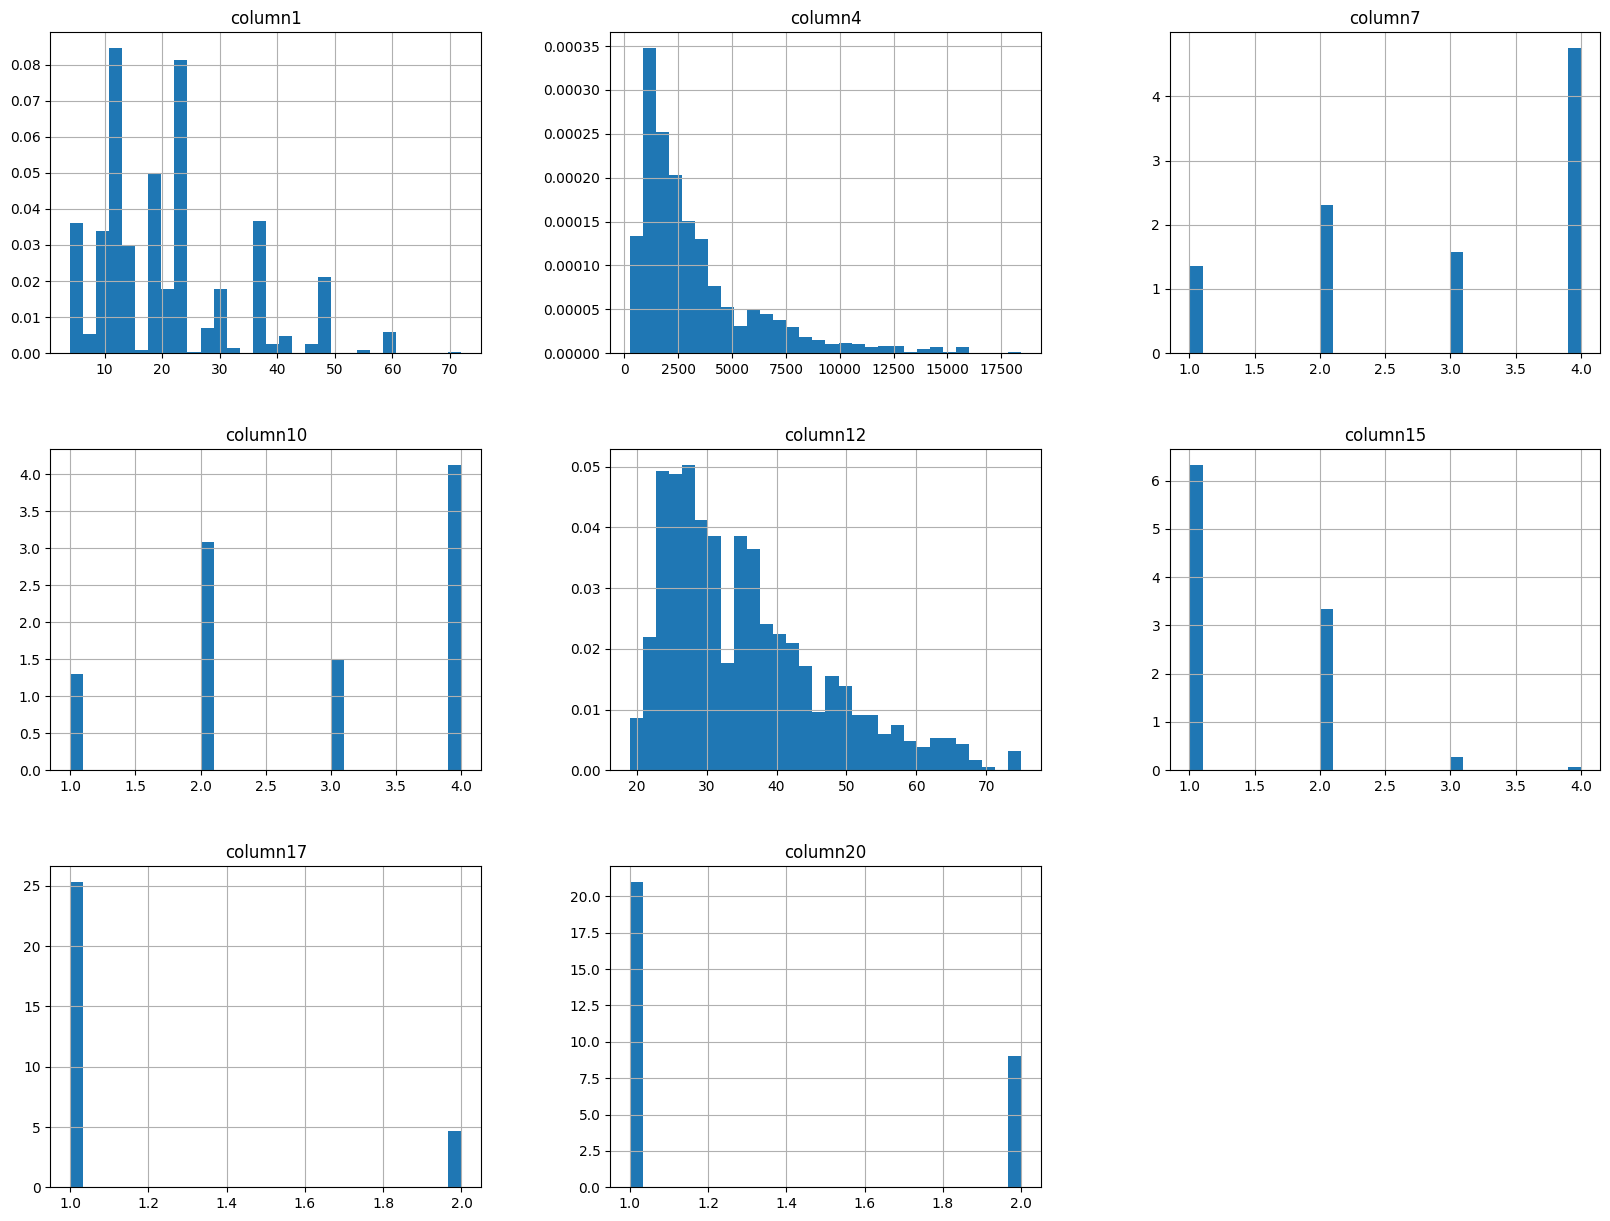

In [31]:
df.hist(bins=30, figsize=(20,15), density=True)   # Display histograms for each numerical column
plt.show()

In [32]:

# Check Correlations
# We investigate the correlation between different variables in the dataset to identify relationships and dependencies.
# Here, we visualize the correlation matrix as a heatmap.

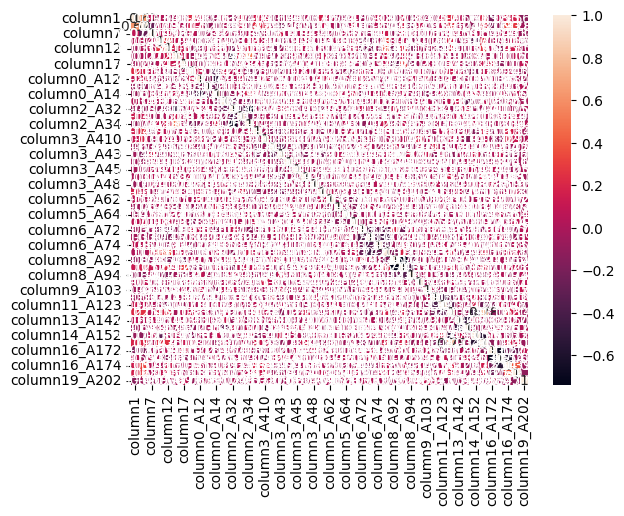

In [38]:
sns.heatmap(df.corr(), annot=True)   # Display a heatmap of correlation matrix
plt.show()

In [34]:
# Handle Categorical Variables
# If the dataset contains categorical variables, we encode them into numerical values using techniques like one-hot encoding.
# This ensures compatibility with machine learning algorithms.

In [35]:
df = pd.get_dummies(df, drop_first=True)   # Perform one-hot encoding for categorical variables

In [39]:
# Outlier Detection
# Outliers can significantly impact analysis and statistical models, so we detect and handle them using methods like the IQR score.
# Outliers are data points that significantly deviate from the rest of the data.

In [40]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

In [41]:
Q1 = numeric_df.quantile(0.25)   # Calculate first quartile (25th percentile)

In [42]:
Q3 = numeric_df.quantile(0.75)   # Calculate third quartile (75th percentile)

In [43]:
IQR = Q3 - Q1   # Calculate interquartile range (IQR)

In [44]:
# Remove outliers using IQR method

In [45]:
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [48]:
# Feature Scaling
# Feature scaling is a crucial preprocessing step in machine learning pipelines, especially when the features in the dataset have different scales. Scaling the features to a standard scale ensures fair comparison and better performance of machine learning algorithms.


In [49]:
# Import StandardScaler from scikit-learn

In [47]:
from sklearn.preprocessing import StandardScaler

In [50]:
# Select only numeric columns for scaling
# We begin by selecting only the numeric columns in the dataset as these are the ones that typically require scaling.

In [51]:
numeric_df = df.select_dtypes(include=[np.number])

In [52]:
# Initialize StandardScaler object
# Next, we initialize a StandardScaler object from scikit-learn. StandardScaler scales each feature to have a mean of 0 and a standard deviation of 1.


In [53]:
scaler = StandardScaler()

In [54]:

# Scale the numeric features
# We then use the fit_transform method of StandardScaler to scale the numeric features in the dataset.

In [55]:
scaled_features = scaler.fit_transform(numeric_df)

In [56]:
# Create a DataFrame with scaled features
# After scaling, we create a new DataFrame called scaled_df to store the scaled features, ensuring that the column names are retained.


In [57]:
scaled_df = pd.DataFrame(scaled_features, columns=numeric_df.columns)

In [58]:
# Combine scaled numeric features with non-numeric columns
# Since scaling only affects numeric features, we combine the scaled numeric features with the non-numeric columns to ensure that no information is lost.


In [59]:
for column in df.columns:
    if column not in numeric_df.columns:
        scaled_df[column] = df[column]

In [60]:

# Reassign the scaled DataFrame to df
# Finally, we reassign the scaled DataFrame back to the original DataFrame variable df for further analysis or modeling.


In [61]:
df = scaled_df

In [62]:

# Save the scaled data to a new CSV file
# Optionally, we can save the scaled data to a new CSV file named 'scaled_data.csv' for future reference or use.

In [63]:
scaled_df.to_csv('scaled_data.csv', index=False)

# Step 5: Data preprocessing

In [70]:
# Check for missing values
# First, we check for missing values in the dataset. Missing data can adversely affect the quality of analysis and modeling.


In [71]:
missing_values = df.isnull().sum()

In [72]:
# Filter columns with missing values
# We identify columns that contain missing values to determine which features need to be processed further.

In [73]:
columns_with_missing_values = missing_values[missing_values > 0].index

In [74]:
# Handle missing values
# Depending on the nature and amount of missing data, we employ appropriate methods to handle missing values.

In [75]:
if len(columns_with_missing_values) > 0:
    for column in columns_with_missing_values:
        # Check if the column contains numerical values
        if pd.api.types.is_numeric_dtype(df[column]):
            # For numerical columns, we fill missing values with the mean of that column.
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            # For non-numeric columns, we fill missing values with the mode (most frequent value)
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)


In [76]:
# Confirm that missing values have been handled
# After handling missing values, we confirm that no missing values remain in the dataset.

In [77]:
print(df.isnull().sum())

column1          0
column4          0
column7          0
column10         0
column12         0
column15         0
column17         0
column20         0
column0_A12      0
column0_A13      0
column0_A14      0
column2_A31      0
column2_A32      0
column2_A33      0
column2_A34      0
column3_A41      0
column3_A410     0
column3_A42      0
column3_A43      0
column3_A44      0
column3_A45      0
column3_A46      0
column3_A48      0
column3_A49      0
column5_A62      0
column5_A63      0
column5_A64      0
column5_A65      0
column6_A72      0
column6_A73      0
column6_A74      0
column6_A75      0
column8_A92      0
column8_A93      0
column8_A94      0
column9_A102     0
column9_A103     0
column11_A122    0
column11_A123    0
column11_A124    0
column13_A142    0
column13_A143    0
column14_A152    0
column14_A153    0
column16_A172    0
column16_A173    0
column16_A174    0
column18_A192    0
column19_A202    0
dtype: int64


In [78]:
# Handle Categorical Variables
# If the dataset contains categorical variables, we encode them into numerical values using techniques like one-hot encoding.
# This transformation ensures compatibility with machine learning algorithms.

In [80]:
columns_to_encode = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]

In [81]:
df = pd.get_dummies(df, columns=df.columns[columns_to_encode])

In [82]:
# Normalize the features
# Feature normalization, such as standardization, is essential to ensure that features have the same scale,
# which can improve the performance of machine learning algorithms.

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

In [89]:
X = df.drop('column20', axis=1)  # Features

In [90]:
y = df['column20']  # Target variable

In [91]:
X = scaler.fit_transform(X)

# Step 6: Splitting the Data

In [92]:
# Splitting the Data

In [93]:
# Divide the dataset into training and testing sets
# The process of splitting the data into training and testing sets is crucial for evaluating the model's performance.
# The training set is used to train the model on a subset of the data, allowing it to learn patterns and relationships.
# The testing set, which is kept separate from the training set, is used to assess the model's performance on unseen data.
# This helps to evaluate how well the model generalizes to new, unseen examples.

In [94]:
# We use the train_test_split function from the scikit-learn library to split the dataset.
# It randomly divides the data into training and testing sets based on the specified test_size (in this case, 20% for testing).
# The random_state parameter ensures reproducibility of the split.

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Training

In [98]:
# Model Training

# In this step, we train a logistic regression model using the training data. Logistic regression is a commonly used algorithm for binary classification tasks.


In [99]:
# Importing the necessary module

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
# Initialize the logistic regression model
# Logistic regression is a linear model used for binary classification tasks, where the target variable has two possible outcomes.
# Here, we initialize a logistic regression model object named 'model' using the LogisticRegression class from the scikit-learn library.
# Logistic regression works by fitting a logistic function to the input features to estimate the probability of a particular outcome.


In [102]:
model = LogisticRegression()

In [106]:
# Fit the logistic regression model to the training data
# Once the logistic regression model is initialized, the next step is to fit it to the training data.
# Fitting the model involves finding the optimal parameters (coefficients) that best fit the training data, minimizing the difference between the actual and predicted outcomes.
# The fit method takes the features (X_train) and target variable (y_train) as input and adjusts the model parameters to minimize the logistic loss function, typically using optimization techniques like gradient descent.
# During the training process, the model learns the relationships between the input features and the target variable, allowing it to make predictions on new data.


In [107]:
# Before fitting the model, ensure that the target variable (y_train) is categorical
# If it's not already categorical, you can encode it into two distinct classes

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
label_encoder = LabelEncoder()

In [110]:
y_train_encoded = label_encoder.fit_transform(y_train)

In [111]:
# Now, fit the logistic regression model with the encoded target variable

In [112]:
model.fit(X_train, y_train_encoded)

LogisticRegression()

# step 8: model eveluation

In [115]:
# We start by making predictions on the test set using the trained model. This allows us to compare the model's predictions with the actual target values.


In [117]:
# Make predictions on the test set
# Using the trained logistic regression model, we generate predictions for the test set (X_test).

In [114]:
y_pred = model.predict(X_test)

In [121]:
y_pred = model.predict(X_test)

In [122]:
# Round the predicted values to the nearest integer

In [123]:
y_pred_rounded = np.round(y_pred)

In [130]:
# Calculate Mean Squared Error (MSE)
# Mean Squared Error (MSE) is a commonly used metric to evaluate the performance of regression models.
# It measures the average of the squares of the errors or deviations, which indicates how close the predicted values are to the actual values.


In [131]:
mse = mean_squared_error(y_test, y_pred)

In [132]:
# Print the Mean Squared Error (MSE)

In [133]:
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 1.075379327177467


# Step 9: Model Fine-Tuning

In [139]:
# Fine-tune the model by experimenting with different hyperparameters and regularization techniques.

# Example: Using a different regularization strength
# In this example, we fine-tune the model by adjusting the regularization strength (alpha parameter) of a Ridge regression model.


In [140]:

# Import the Ridge regression model from scikit-learn

In [141]:
from sklearn.linear_model import Ridge

In [142]:
# Initialize the Ridge regression model with a different regularization strength (alpha parameter)
# The alpha parameter controls the degree of regularization applied to the model.
# A higher alpha value increases the regularization strength, which can help prevent overfitting by penalizing large coefficient values.


In [143]:
model_tuned = Ridge(alpha=0.5)

In [144]:
# Fit the model to the training data
# By fitting the model to the training data, we adjust the model parameters (coefficients) to minimize the difference between the actual and predicted target values.
# This process involves optimizing the model's performance on the training data.

In [145]:
model_tuned.fit(X_train, y_train)

Ridge(alpha=0.5)

In [146]:
# Make predictions on the test set
# After fitting the model, we make predictions on the test set to evaluate its performance on unseen data.
# The model uses the learned relationships between the input features and the target variable to generate predictions for the test instances.


In [147]:
y_pred_tuned = model_tuned.predict(X_test)

In [148]:
# Calculate mean squared error (MSE)
# To assess the model's performance, we calculate the mean squared error (MSE) between the actual target values (y_test) and the predicted values (y_pred_tuned).
# MSE measures the average squared difference between the predicted and actual values, providing a measure of the model's accuracy.


In [149]:
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

In [150]:
print(f'Mean Squared Error (MSE) after fine-tuning: {mse_tuned}')

Mean Squared Error (MSE) after fine-tuning: 1.1236764125164675


## Step 10: Making Predictions

In [152]:
# Use the trained model to make predictions on new data.

In [153]:
# Example: Predicting a single instance
# To make predictions on new data, you can use the trained model's predict method.
# First, create an array containing the features of the new data instance.
# Replace 'new_data' with the features of the new data instance you want to predict.

In [154]:
new_data = np.array([X_test[0]])  # Replace with new data

In [155]:
# Then, use the predict method to obtain the prediction for the new data instance.

In [156]:
prediction = model_tuned.predict(new_data)

In [157]:
# Finally, print the prediction.

In [158]:
print(f'Prediction: {prediction}')

Prediction: [0.26607567]
